In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
import yfinance as yf

start = '2010-01-01'
end = '2023-05-15'
df = yf.download('AAPL', start=start, end=end)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.260345,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700
2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800


In [6]:
df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [9]:
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


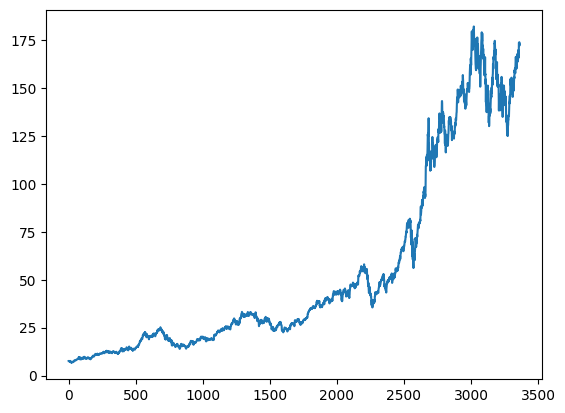

In [10]:
plt.plot(df.Close)

In [11]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3358,172.479996,173.850006,172.110001,173.500000,55962800
3359,173.050003,173.539993,171.600006,171.770004,45326900
3360,173.020004,174.029999,171.899994,173.559998,53724500
3361,173.850006,174.589996,172.169998,173.750000,49514700


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3358    150.419900
3359    150.682900
3360    150.986399
3361    151.358899
3362    151.739500
Name: Close, Length: 3363, dtype: float64

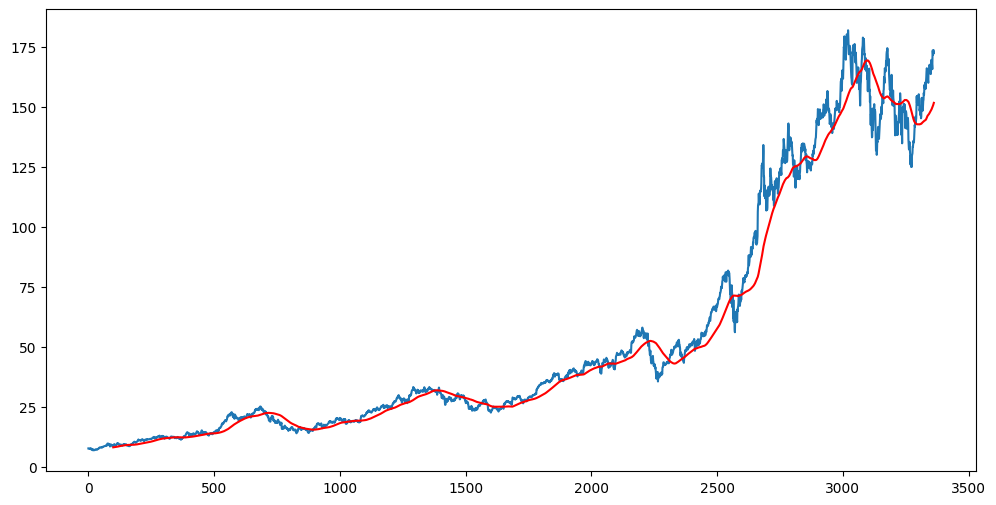

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3358    151.462949
3359    151.551350
3360    151.654400
3361    151.765149
3362    151.844050
Name: Close, Length: 3363, dtype: float64

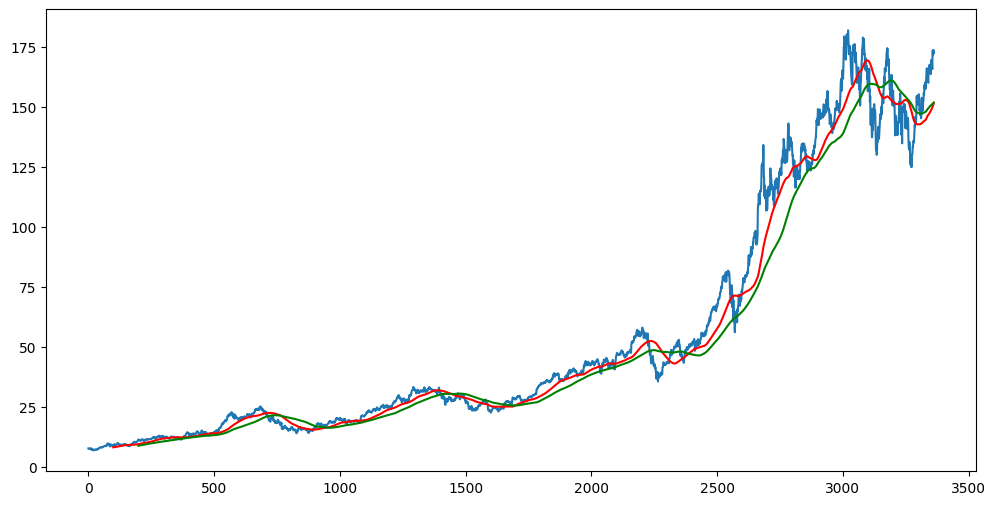

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
df.shape

(3363, 5)

In [18]:
#spliting data into training and testing
data_training = df['Close'][0:int(len(df)*0.70)].to_frame()
data_testing = df['Close'][int(len(df)*0.70):].to_frame()

print(data_training)
print(data_testing)


          Close
0      7.643214
1      7.656429
2      7.534643
3      7.520714
4      7.570714
...         ...
2349  52.119999
2350  50.715000
2351  50.724998
2352  50.180000
2353  49.294998

[2354 rows x 1 columns]
           Close
2354   46.430000
2355   47.165001
2356   47.730000
2357   47.520000
2358   47.250000
...          ...
3358  173.500000
3359  171.770004
3360  173.559998
3361  173.750000
3362  172.570007

[1009 rows x 1 columns]


In [19]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [20]:
data_testing.head()

,Close
2354,46.430000
2355,47.165001
2356,47.730000
2357,47.520000
2358,47.250000


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(2354, 1)

In [40]:
x_train = []
y_train = []

for i in range(100, len(data_training_array)):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(2254, 100, 1)

In [39]:
#ml model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [46]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_7 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_8 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_9 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_10 (LSTM)              (None, 120)              

In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
71/71 [==============================] - 16s 164ms/step - loss: 0.0355
Epoch 2/50
71/71 [==============================] - 13s 176ms/step - loss: 0.0072
Epoch 3/50
71/71 [==============================] - 12s 170ms/step - loss: 0.0060
Epoch 4/50
71/71 [==============================] - 13s 180ms/step - loss: 0.0056
Epoch 5/50
71/71 [==============================] - 13s 186ms/step - loss: 0.0048
Epoch 6/50
71/71 [==============================] - 14s 190ms/step - loss: 0.0046
Epoch 7/50
71/71 [==============================] - 13s 185ms/step - loss: 0.0045
Epoch 8/50
71/71 [==============================] - 13s 189ms/step - loss: 0.0043
Epoch 9/50
71/71 [==============================] - 13s 188ms/step - loss: 0.0045
Epoch 10/50
71/71 [==============================] - 14s 194ms/step - loss: 0.0041
Epoch 11/50
71/71 [==============================] - 14s 190ms/step - loss: 0.0037
Epoch 12/50
71/71 [==============================] - 14s 201ms/step - loss: 0.0047
Epoch 13/50
7

In [50]:
model.save('keras_model.hs')

INFO:tensorflow:Assets written to: keras_model.hs\assets


INFO:tensorflow:Assets written to: keras_model.hs\assets


In [51]:
data_testing.head()

,Close
2354,46.430000
2355,47.165001
2356,47.730000
2357,47.520000
2358,47.250000


In [52]:
past_100_days = data_training

In [55]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [56]:
final_df.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [58]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.95175595],
       [0.95284074],
       [0.94610374]])

In [60]:
input_data.shape

(3363, 1)

In [61]:
x_test =[]
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])


In [62]:
x_test , y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(3263, 100, 1)
(3263,)


In [63]:
#making predictions
y_predicted = model.predict(x_test)

102/102 [==============================] - 7s 59ms/step


In [64]:
y_predicted.shape

(3263, 1)

In [65]:
y_test

array([0.01249941, 0.0132192 , 0.01402463, ..., 0.95175595, 0.95284074,
       0.94610374])

In [66]:
y_predicted

array([[0.09042275],
       [0.09039001],
       [0.09036037],
       ...,
       [0.8807844 ],
       [0.88455987],
       [0.8885095 ]], dtype=float32)

In [67]:
scaler.scale_

array([0.00570936])

In [68]:
scale_factor = 1/0.00570936
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

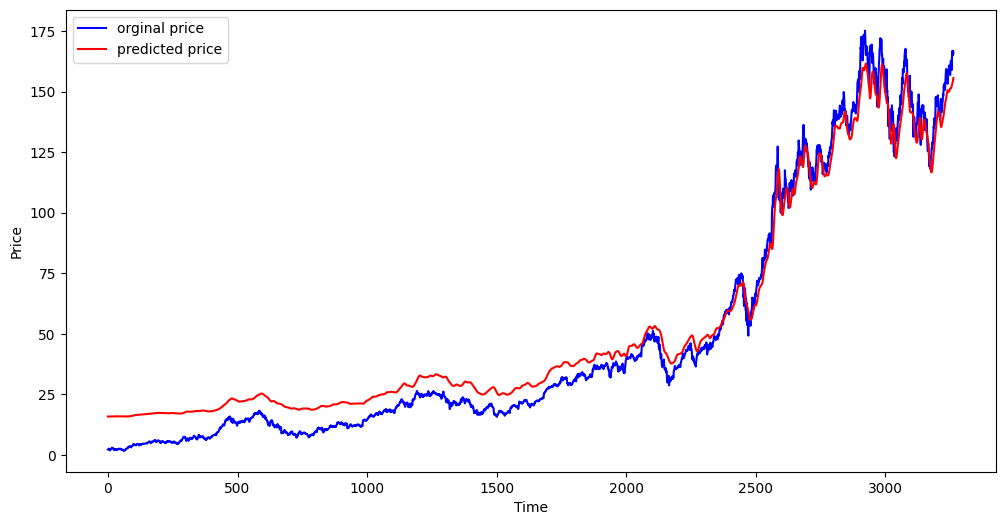

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='orginal price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()